# Introduction to PreProcessing

* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning

Common import¶


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# StandardScaler

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

In scikit-learn, this is often a necessary step, because many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model.

The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
Calculate - Subtract mean of column & div by standard deviation


When to standardize:
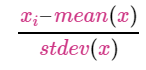

* Models in linear space
* Dataset features have high variance
* If data is not normally distributed, this is not the best scaler to use.

In [8]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

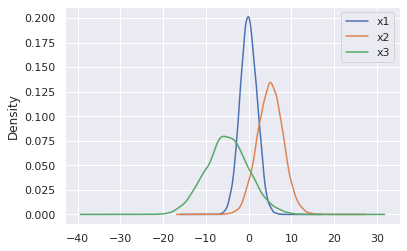

In [9]:
# plotting data

df.plot.kde()

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

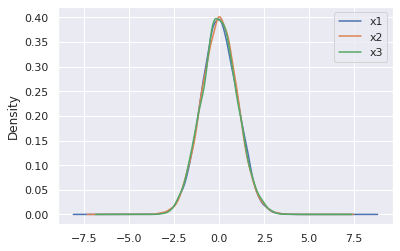

In [11]:
data = ss.fit_transform(df)
df = pd.DataFrame(data, columns=['x1','x2','x3'])
df.plot.kde()

# MinMaxScaler

* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min
    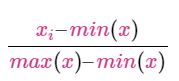


* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [12]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

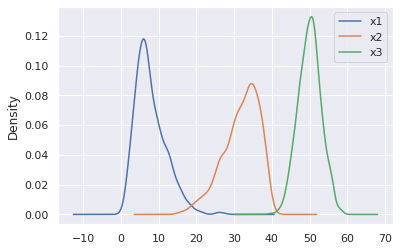

In [13]:
df.plot.kde()

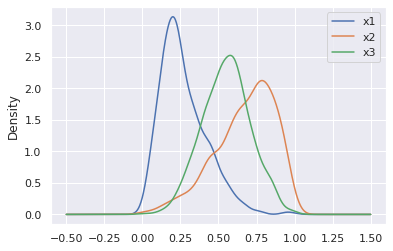

In [14]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
data_tf = mm.fit_transform(df)
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

# Robust Scaler

Suited for data with outliers
Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile
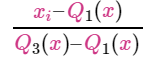

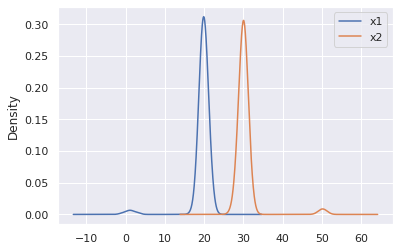

In [15]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
df.plot.kde()

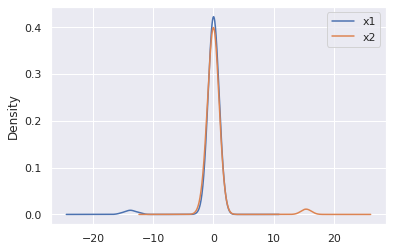

In [16]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])
df.plot.kde()

# Normalizer

* Each parameter value is obtained by dividing by magnitude

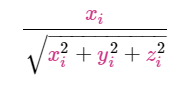
* Centralizes data to origin

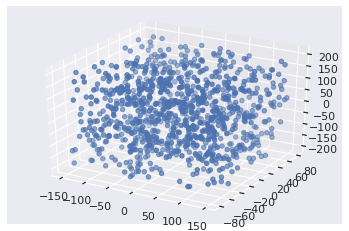

In [17]:
df = pd.DataFrame({
    'x1': np.random.randint(-150, 150, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-200, 200, 1000).astype(float),
})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

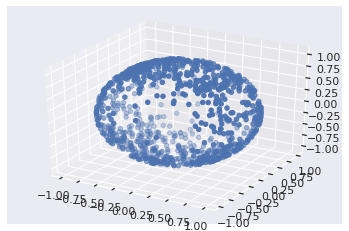

In [18]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

# Binarization

* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes 

In [19]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
data_tf = binarizer.fit_transform(X)
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

# Encoding Categorical Values

## Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [20]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [21]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

## Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [22]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [24]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

# Imputation

* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [26]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

# Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with polynomial regression to learn model of higher degree

In [28]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [29]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

# Custom Transformer
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer
* validate = False, is required for string columns

In [32]:
from sklearn.preprocessing import FunctionTransformer
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

customtransformer = FunctionTransformer(mapping, validate=False)
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [33]:
customtransformer.transform(df)


,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4
